In [11]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("./data/Hour By Hour Race Analysis.csv", sep=',', encoding='cp1252')

In [ ]:
df

,S.No,Hour,Car No.,Team,Drivers,Car,Category,Tyres,Laps,Total Time,Pitstops,Best Lap Number,Best LapTime,Best Lap Kph,Status
0,1,1,8,Toyota Gazoo Racing,S. BUEMI / B. HARTLEY / R. HIRAKAWA,Toyota GR010 HYBRID,HYPERCAR,M,12,01:01:15,0,10.0,03:29.7,234.0,Running
1,2,1,51,Ferrari AF Corse,A. PIER GUIDI / J. CALADO / A. GIOVINAZZI,Ferrari 499P,HYPERCAR,M,12,01:01:19,0,12.0,03:29.1,234.6,Running
2,3,1,7,Toyota Gazoo Racing,M. CONWAY / K. KOBAYASHI / J. LOPEZ,Toyota GR010 HYBRID,HYPERCAR,M,12,01:01:21,0,12.0,03:30.0,233.6,Running
3,4,1,75,Porsche Penske Motorsport,F. NASR / M. JAMINET / N. TANDY,Porsche 963,HYPERCAR,M,12,01:01:22,0,12.0,03:29.9,233.7,Running
4,5,1,6,Porsche Penske Motorsport,K. ESTRE / A. LOTTERER / L. VANTHOOR,Porsche 963,HYPERCAR,M,12,01:01:23,0,9.0,03:30.0,233.6,Running
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,1482,24,60,Iron Lynx,C. SCHIAVONI / M. CRESSONI / A. PICARIELLO,Porsche 911 RSR - 19,LMGTE Am,M,28,02:20:55,2,8.0,03:51.4,212.0,Retired
1482,1483,24,16,Proton Competition,R. HARDWICK / Z. ROBICHON / J. HEYLEN,Porsche 911 RSR - 19,LMGTE Am,M,28,02:20:57,2,10.0,03:58.7,205.5,Retired
1483,1484,24,55,GMB Motorsport,G. BIRCH / M. SØRENSEN/ J. MØLLER,Aston Martin Vantage AMR,LMGTE Am,M,21,01:45:27,2,17.0,03:56.2,207.7,Retired
1484,1485,24,21,AF Corse,S. MANN / J. PIGUET / U. DE PAUW,Ferrari 488 GTE Evo,LMGTE Am,M,21,01:45:28,2,11.0,03:54.8,208.9,Retired


In [10]:
df.columns

Index(['S.No', 'Hour', 'Car No.', 'Team', 'Drivers', 'Car', 'Category',
       'Tyres  ', 'Laps', 'Total Time', 'Pitstops', 'Best Lap Number',
       'Best LapTime', 'Best Lap Kph', 'Status'],
      dtype='object')

In [ ]:
X = df[['Laps', 'Best Lap Kph']]

df['Top_10'] = (df['S.No'] <= 10).astype(int)
y = df['Top_10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

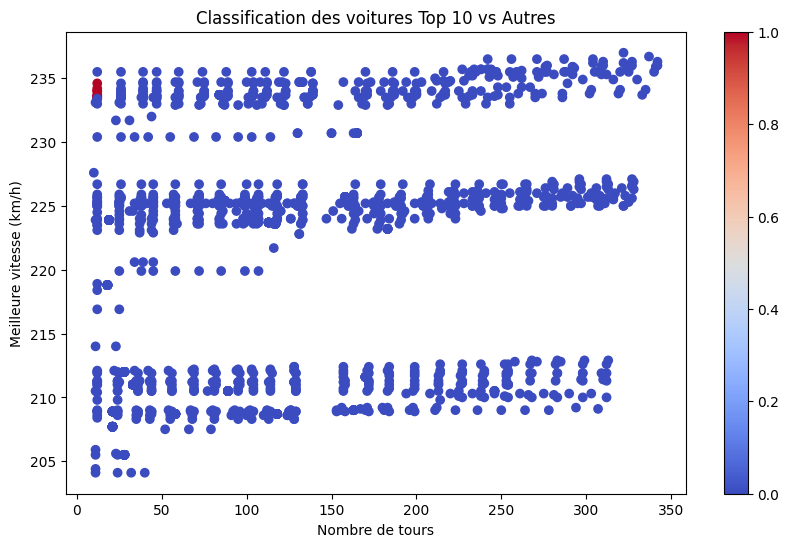

In [14]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Laps'], X['Best Lap Kph'], c=y, cmap='coolwarm')
plt.xlabel('Nombre de tours')
plt.ylabel('Meilleure vitesse (km/h)')
plt.title('Classification des voitures Top 10 vs Autres')
plt.colorbar(scatter)
plt.show()